# Practice for A1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import neuron_models as nm

# Create an Input Neuron
Here is how you can create input to feed into other neurons.

In [2]:
# You can use the generate_spike_train to produce spikes at a chosen frequency
spikes = nm.generate_spike_train([[0, 20],    # 20Hz starting at t=0
                                  [0.75, 10], # 10Hz starting at t=0.75
                                  [1.3, 0]    # 0Hz starting at t=1.3
                                 ])

In [3]:
spikes

array([0.025, 0.075, 0.125, 0.175, 0.225, 0.275, 0.325, 0.375, 0.425,
       0.475, 0.525, 0.575, 0.625, 0.675, 0.725, 0.8  , 0.9  , 1.   ,
       1.1  , 1.2  ])

In [4]:
# Create an InputNeuron object using the spike train
inp = nm.InputNeuron(spikes, label='inp')

# Create a Spiking Network

In [5]:
net = nm.SpikingNetwork()                  # Create a SpikingNetwork object

net.add_neuron(inp)                        # IMPORTANT: you have to ADD each neuron to the network

net.simulate(1.5, 0.001)                   # Simulate the network for 1.5 seconds with 0.001s steps

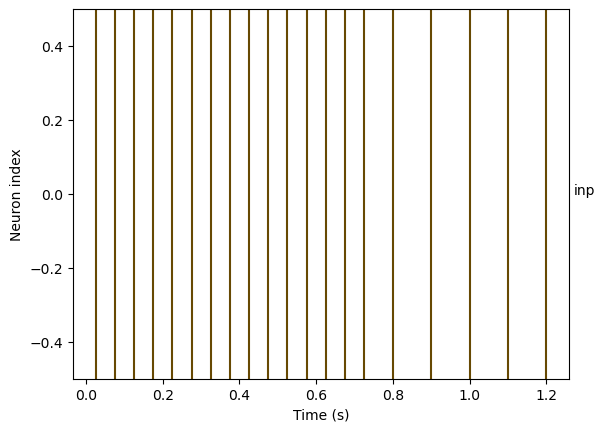

In [6]:
# You can plot the spikes
net.spike_raster()

In [7]:
# You can also access the spike trains of the neuron(s) in the network.
print(net.neur[0].get_spikes())

[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475 0.525 0.575
 0.625 0.675 0.725 0.8   0.9   1.    1.1   1.2  ]


## Connecting two neurons

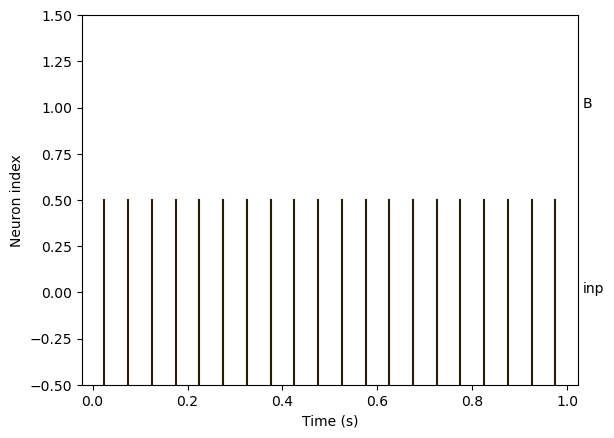

In [8]:
net = nm.SpikingNetwork()   # Create network
inp = nm.InputNeuron( nm.generate_spike_train([[0, 20]]) , label='inp' )  # input neuron
net.add_neuron(inp)         # ADD it to the network

B = nm.SpikingNeuron(label='B')  # Create another neuron (this one does nothing)
net.add_neuron(B)                # Remember to ADD it to the network

inp.connect_to(B, 0.7)   # This is how you connect inp to B with weight 0.7

net.simulate(1.5, 0.001)
net.spike_raster()

## Counting Spikes

In [9]:
# How many spikes between 0.5 and 1 seconds?
spike_count = nm.spikes_between(net.neur[0].get_spikes(), t_start=0.5, t_end=1.)
print(f'There were {spike_count} spikes')

There were 10 spikes
